In [1]:
# import dependencies
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plots\\'

In [3]:
# define HYPERPARAMS
plot_unit   = '6 hours'
plot_suffix = '6h'
plot_nsteps = 720 # 2 steps per minute

# set seaborn style/them
sns.set_theme()
sns.set_style('white')

In [64]:
# get data for climate variables
data_climate = pd.read_csv(
    data_path + 'climate_merged.csv',
    header=[0, 1],
    index_col=0
)
data_climate.index = pd.to_datetime(data_climate.index.values)


In [74]:
# get data for control variables
data = pd.read_csv(
    data_path + 'control.csv',
    header=[0, 1, 2],
    index_col=0
)
data.index = pd.to_datetime(data.index.values)

# FLATTEN column indices (merge level 1 and 2)
subcols = [
    f'{x}_{y}' for x, y in zip(
        data.columns.get_level_values(level=1), 
        data.columns.get_level_values(level=2)
    )
]

data.columns = pd.MultiIndex.from_tuples(zip(data.columns.get_level_values(level=0), subcols))

# merge datasets
data = data.merge(right=data_climate, left_index=True, right_index=True)

In [48]:
# find and print all available sensors for different data categories
cols = data.columns.get_level_values(0).unique()
for col in cols:
    subcols = data[col].columns
    
    print(col.upper())
    #print('\n')
    for subcol in subcols:
        print('\t\t{}'.format(subcol))
    #print('\n\n')
    print('\n')

FLOW
		DC_SP103
		DC_SP104
		DC_SP105
		DC_SP106
		DC_SP107
		DC_SP108
		DC_SP110
		DC_SP111
		DC_SP112
		DC_SP113
		FF01_GP101
		FF02_GP101
		TA01_GP101
		TA01_SP101
		TA01_SP102
		TA02_GP101
		TA02_SP109


STATE
		DC_SP103
		DC_SP103
		DC_SP104
		DC_SP104
		DC_SP105
		DC_SP105
		DC_SP106
		DC_SP106
		DC_SP107
		DC_SP107
		DC_SP108
		DC_SP108
		DC_SP110
		DC_SP110
		DC_SP111
		DC_SP111
		DC_SP112
		DC_SP112
		DC_SP113
		DC_SP113
		FF01_output
		FF02_output
		TA01_SP101
		TA01_SP101
		TA01_SP101_output
		TA01_SP102
		TA01_SP102
		TA01_SP102_output
		TA01_output
		TA02_SP109
		TA02_SP109
		TA02_SP109_output
		TA02_output


HUMIDITY
		DC_GT101_GM101
		DC_GT102_GM102
		DC_GT103_GM103
		DC_GT104_GM104
		DC_GT401_GM401
		TA01_GT10X_GM10X
		TA01_GT401_GM401
		TA02_GT401_GM401
		SMHI


PRESSURE
		DC_GP101
		FF01_GP101
		FF02_GP101
		TA01_GP101
		TA01_GP102
		TA01_GP103
		TA01_GP401
		TA02_GP101
		TA02_GP401
		SMHI


TEMPERATURES
		DC_GT101_GM101
		DC_GT102_GM102
		DC_GT103_GM103
		DC_GT104_GM

In [49]:
# define plot categories and params
plot_cats = [
    # EXAMPLE: ('title', 'type', 'filter (RegEx)', 'units', 'palette', 'alpha', 'filename'),
    {
        'title':'DC, TA01-GP101 - Flow, {}'.format(plot_unit),
        'type':'flow',
        'filter':'TA01_GP101|FF01_GP101',
        'units':'l/s', 
        'palette':'magma',
        'alpha':1.0,
        'fname':'dc_flow_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC, TA01 - Flow, {}'.format(plot_unit),
        'type':'state',
        'filter':'TA01_output',
        'units':'...', 
        'palette':'magma',
        'alpha':1.0,
        'fname':'dc_outp_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH, SP - Flow, {}'.format(plot_unit),
        'type':'flow',
        'filter':'TA01',
        'units':'l/s', 
        'palette':'YlOrRd_r',
        'alpha':0.9,
        'fname':'gh_ta01_flow_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC, SP - Flow, {}'.format(plot_unit),
        'type':'flow',
        'filter':'DC_SP',
        'units':'l/s', 
        'palette':'YlOrRd_r',
        'alpha':0.8,
        'fname':'dc_sp_flow_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC - Temperatures, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'GM401',
        'units':'$^\circ$C', 
        'palette':'YlOrRd_r',
        'alpha':0.9,
        'fname':'dc_temp_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC - Humidity, {}'.format(plot_unit),
        'type':'humidity',
        'filter':'GM401',
        'units':'$\%$', 
        'palette':'crest',
        'alpha':0.9,
        'fname':'dc_humid_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH - Avg., {}'.format(plot_unit),
        'type':'all',
        'filter':'X',
        'units':'$^\circ$C, $\%$', 
        'palette':'mako',
        'alpha':1.0,
        'fname':'ghavg_all_{}.png'.format(plot_suffix)
    },
    {
        'title':'DC - , {}'.format(plot_unit),
        'type':'all',
        'filter':'DC_GT401_GM401',
        'units':'$^\circ$C, $\%$', 
        'palette':'mako',
        'alpha':1.0,
        'fname':'dc_all_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH & OUT - Temperatures, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'X|GT301|SMHI',
        'units':'$^\circ$C', 
        'palette':'YlOrRd_r',
        'alpha':1.0,
        'fname':'ghout_temp_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH, DC & OUT - Humidity, {}'.format(plot_unit),
        'type':'humidity',
        'filter':'X|DC_GT401_GM401|SMHI',
        'units':'$\%$', 
        'palette':'crest',
        'alpha':1.0,
        'fname':'ghdcout_hum_{}.png'.format(plot_suffix)
    },
    {
        'title':'OUT - Temperature, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'GT301|SMHI',
        'units':'$^\circ$C', 
        'palette':'mako',
        'alpha':1.0,
        'fname':'out_temp_{}.png'.format(plot_suffix)
    },
    {
        'title':'GH - Temperature, {}'.format(plot_unit),
        'type':'temperatures',
        'filter':'X',
        'units':'$^\circ$C', 
        'palette':'mako',
        'alpha':1.0,
        'fname':'ghavg_temp_{}.png'.format(plot_suffix)
    }
]

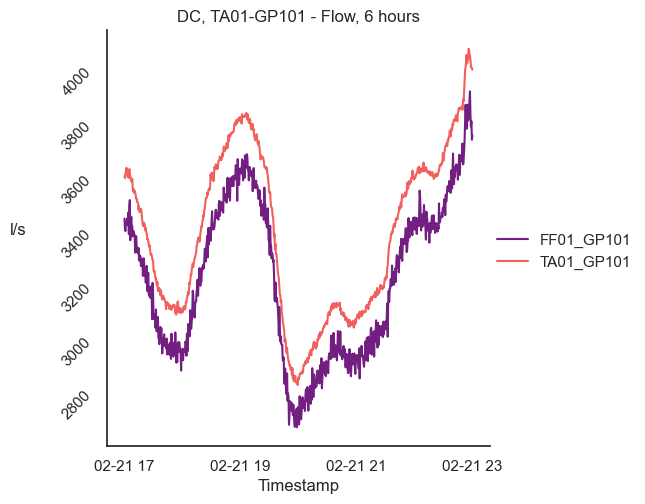

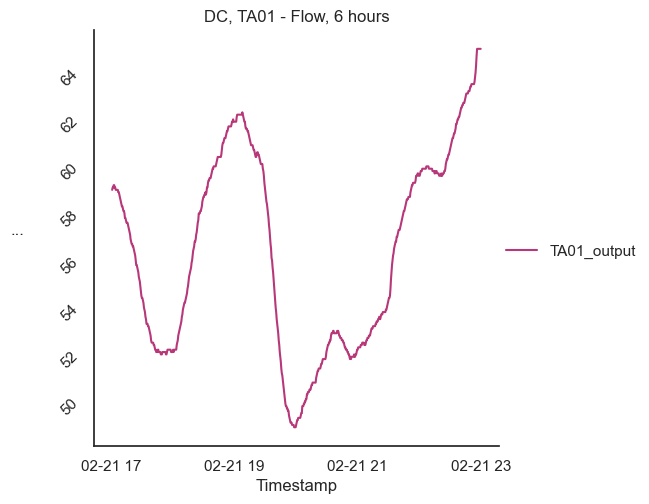

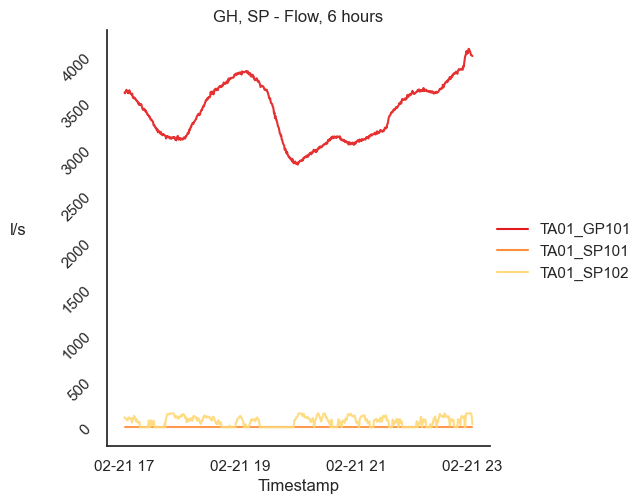

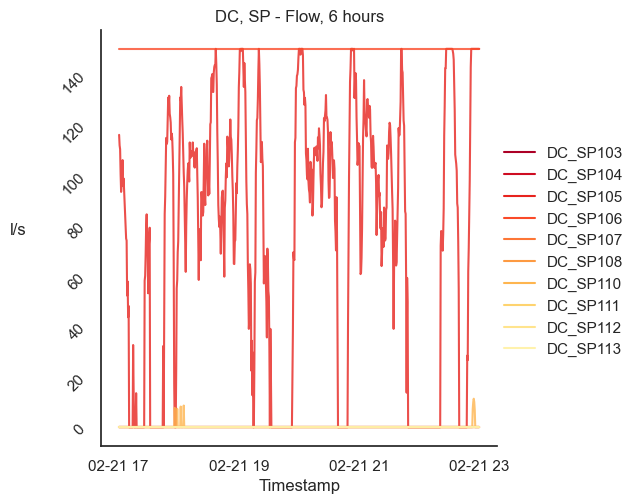

In [50]:
# crop data
data_cropped = data.iloc[-plot_nsteps:]

# iterate over plot params and save figs
for params in plot_cats[:4]:
    
    if params['type'] == 'all':
        subset = data_cropped.filter(regex=params['filter'], axis=1).droplevel(level=1, axis=1)
    else:
        subset = data_cropped[params['type']].filter(regex=params['filter'])
    ax = sns.relplot(
        data=subset,
        kind='line',
        palette= params['palette'],
        alpha= params['alpha'],
        dashes=False,
        markers=False,
        legend='full'
    )

    ax.set_xticklabels(step=2)
    
    plt.yticks(rotation=45)
    plt.xlabel('Timestamp')
    plt.ylabel(params['units'], loc='center', rotation=0, fontsize=12, labelpad=30)
    plt.title(params['title'])
    
    fpath = plot_path + params['fname']
    plt.savefig(fpath, bbox_inches='tight', dpi=1000)
    plt.show()